# **Faktor apakah yang menjual sebuah mobil?**
Kamu adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Nah, kamu ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Tujuan : Mengetahui permasalahan dalam data melalui faktor-faktor yang mempengaruhi harga dalam penjualan sebuah kendaraan.
    
Hipotesis : 
1. Apakah nilai hilang, tipe data tak sesuai, dan nilai outlier dalam data yang mempengaruhi kualitas dalam data itu sendiri menjadi faktor penjualan naik maupun turun?
2. Dengan melihat dan mempelajari data bersih, apakah melalui cara median, atau mencari interquantilnya yang dapat menyimpulkan sebuah masalah dalam data?
3. Apakah faktor harga menjadi salah satu acuan bahwa kendaraan dapat laku keras atau malah menyebabkan sebaliknya?

## Pra-pemrosesan

Dictionary yang digunakan menggunkan numpy sebagai tools untuk membantu perhitungan statistik, dan matplotlib yang akan digunakan sebagai visualisasi data.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Memuat Data

Muat dataframe beserta informasi umumnya

In [58]:
try:
    data_vehicles = pd.read_csv('vehicles_us.csv')
except:
    data_vehicles = pd.read_csv('/datasets/vehicles_us.csv') 

### Mengeksplorasi Data Awal

Dataset yang kamu miliki berisi kolom-kolom berikut:

- `price` — harga satuan unit kendaraan
- `model_year` — tahun kendaraan produksi
- `model` — model kendaraan
- `condition` — kondisi kendaraan
- `cylinders` — jumlah silinder kendaraan
- `fuel` — gas, disel, dan lain-lain.
- `type` — jenis kendaraan
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` — jenis transmisi
- `paint_color` — warna kendaraan
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [59]:
data_vehicles.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [60]:
data_vehicles.sample(10) 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
36529,9995,2015.0,ford fusion,good,4.0,gas,107136.0,automatic,sedan,grey,NaN,2018-07-06,39
1905,3600,2006.0,volkswagen jetta,excellent,4.0,gas,125000.0,automatic,sedan,blue,NaN,2018-12-09,13
25115,5000,1979.0,gmc sierra,fair,8.0,gas,NaN,automatic,truck,green,NaN,2018-05-10,54
18638,17995,2014.0,ford explorer,like new,NaN,gas,NaN,automatic,wagon,white,1.0,2018-09-17,31
971,30300,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,30339.0,automatic,pickup,brown,1.0,2019-04-18,18
41499,10995,2008.0,jeep wrangler,excellent,NaN,gas,170005.0,automatic,SUV,green,1.0,2018-11-10,37
24716,13988,2018.0,nissan altima,good,4.0,gas,78429.0,automatic,sedan,NaN,NaN,2018-12-23,103
39527,18490,2015.0,ford f-250 sd,good,8.0,gas,124332.0,automatic,truck,white,1.0,2019-01-24,73
46922,4000,2000.0,ford explorer,excellent,8.0,gas,123000.0,automatic,SUV,green,1.0,2019-01-14,33
32231,4600,2009.0,dodge grand caravan,good,6.0,gas,173673.0,automatic,mini-van,black,NaN,2018-09-17,77


Ada sedikit masalah pada dataframe terutama pemformatan nilai pada kolom 'date_posted dan condition'. untuk pemformatan tanggal kita bisa langsung mengubahnya ke format dateTime. sedangkan pada nilai conditon sudah cukup baik akan tetapi lebih baik lagi apabila kita ubah pemformatannya menjadi sistim kategorial ordinal (nilai 0-5).

Pada format data/tipe data juga sepertinya ada yang memiliki format tidak sesuai di setiap kolomnya.

Nilai non-null pada info di beberapa kolom ada yang tidak sama dengan jumlah nilai total, sepertinya terdapat nilai yang hilang. 

### Kesimpulan dan Langkah-Langkah Selanjutnya


Setelah melihat data pada dataframe yang memiliki nilai hilang di beberapa kolom, tipe data yang tidak sesuai, dan kualitas data yang perlu di perbaiki, sepertinya perlu dilakukan tindakan awal guna menangani masalah tersebut.

- mulai dari mengatasi nilai yang hilang, dikarenakan nilai yang hilang cukup banyak kita akan mengatasi nilai tersebut (Nan) dengan mengubahnya menjadi nilai 0 terlebih dahulu.
- untuk tipe data di beberapa kolom cukup kita ubah menjadi lebih sesuai.
- pada kualitas data kita akan membutuhkan data yang mudah dipahami untuk di analisis, sehingga kita perlu data tambahan sperti umur mobil, jarak tempuh mobil setiap tahunnya, dll.
- setelah data di proses dengan baik dan bersih, baru kita bisa melakukan eksplorasi data.

Eksplorasi data bisa dilakukan dengan mulai mencari  data outlier, dan yang kemudian kita tangani nilai tersebut, dan kita cari tahu faktor yang mempengaruhi penjualan bisa cepat ataupun lama terjual. setelah semua dilakukan cukup baik yang terakhir kita akan menyimpulkan dengan memvisualisaikan data yang menjadi faktor paling utama dalam jual-beli sebuah kendaraan.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Dikarenakan data pada nilai yang hilang cukup banyak pada is_4wd, maka kita akan mengubahnya menjadi nilai 0 terlebih dahulu guna mencegah persebaran data yang tidak merata yang akan mempengaruhi mean ataupun median dari data itu sendiri. Pada paint_color kita akan mengubahnya dengan nilai 'unknown'. 

Sedangkan pada odometer, cylinders dan model years kita akan mengubahnya ke dalam beberapa kondisi, dimana kita akan menyesuaikan dengan kolom yang lain.

In [61]:
report_null = data_vehicles.isnull().sum().to_frame()
report_null = report_null.rename(columns={0:'missing_values'})
report_null['% of total'] = (report_null['missing_values'] / data_vehicles.shape[0]).round(2)
report_null.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
is_4wd,25953,0.50
paint_color,9267,0.18
odometer,7892,0.15
cylinders,5260,0.10
model_year,3619,0.07
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


In [62]:
data_vehicles['paint_color'] = data_vehicles['paint_color'].fillna('unknown')

In [63]:
data_vehicles['is_4wd'] = data_vehicles['is_4wd'].fillna(0)

In [64]:
grouped_by_condition = data_vehicles.groupby('condition').agg({'odometer': 'median', 'price': 'median'})
for cond in data_vehicles['condition'].unique():
    data_vehicles.loc[(data_vehicles['condition'] == cond) & (data_vehicles['odometer'].isnull()), 'odometer'] = \
        grouped_by_condition.loc[grouped_by_condition.index == cond, 'odometer'][0]
    data_vehicles.loc[(data_vehicles['condition'] == cond) & (data_vehicles['price'].isnull()), 'price'] = \
        grouped_by_condition.loc[grouped_by_condition.index == cond, 'price'][0]

In [65]:
grouped_by_model = data_vehicles.groupby('model').agg({'model_year': 'median', 'cylinders': 'median'})
for model in data_vehicles['model'].unique():
    data_vehicles.loc[(data_vehicles['model'] == model) & (data_vehicles['model_year'].isnull()), 'model_year'] = \
        grouped_by_model.loc[grouped_by_model.index == model, 'model_year'][0]
    data_vehicles.loc[(data_vehicles['model'] == model) & (data_vehicles['cylinders'].isnull()), 'cylinders'] = \
        grouped_by_model.loc[grouped_by_model.index == model, 'cylinders'][0]

In [66]:
report_null = data_vehicles.isnull().sum().to_frame()
report_null = report_null.rename(columns={0:'missing_values'})
report_null['% of total'] = (report_null['missing_values'] / data_vehicles.shape[0]).round(2)
report_null.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
price,0,0.0
model_year,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
transmission,0,0.0
type,0,0.0
paint_color,0,0.0


## Memperbaiki Tipe Data

Tipe data yang tidak sesuai kita ubah dengan tipe yang sesuai agar memudahkan penganalisisan data. Data pada kolom date_posted yang akan kita ubah kedalam datetime sebenarnya. Lalu pada kolom 'cylinders', 'days_listed', 'model_year' kita ubah ke integer agar nilainya menjadi pembulatan bukan pecahan. Pada is_4wd karna pilahannya hanya 2 maka kita ubah ke boolean. Terakhir pada kolom 'price', ' odometer' yang akan diubah ke tipe data float.

In [67]:
data_vehicles['date_posted'] = pd.to_datetime(data_vehicles['date_posted'])

In [68]:
data_vehicles[['cylinders', 'days_listed', 'model_year']] = data_vehicles[['cylinders', 'days_listed', 'model_year']].astype(int)

In [69]:
data_vehicles['is_4wd'] = data_vehicles['is_4wd'].astype(bool)

In [70]:
data_vehicles[['price', ' odometer']] = data_vehicles[['price', 'odometer']].astype(float)

## Memperbaiki Kualitas Data

Agar mempermudah pembacaan data, disini kita tambahkan kolom baru yang berisi nilai dari tahun dari iklan ditayangkan(year_posted), iklan dalam bulan(month_posted), hari dari iklan yang ditayangkan(day_posted), umur mobil(car_years), dan jarak tempuh kendaraan dalam tahun(odo_avg_year).
Serta kita ubah data pada kolom condition menjadi kategorial ordinal dengan nilai angka(0-5), yang dimana 0 merupakan salvage dan 5 merupakan new secara berurutan dari yang peringkat terendah hingga tertinggi.

In [71]:
data_vehicles['year_posted'] = data_vehicles['date_posted'].dt.year

In [72]:
data_vehicles['month_posted'] = data_vehicles['date_posted'].dt.month

In [73]:
data_vehicles['day_posted'] = data_vehicles['date_posted'].dt.day

In [74]:
data_vehicles['car_years'] =  (data_vehicles['year_posted'] - data_vehicles['model_year']).astype(int) + 1

In [75]:
data_vehicles['car_years'].unique()

array([  8,   7,  17,   3,   5,   4,  12,   2,  11,   6,   9,   1,  10,
        16,  15,  14,  18,  13,  54,  25,  19,  20,  27,  23,  39,  21,
        24,  45,  22,  26,  34,  43,  32,  44,  30,  29,  47,  53,  50,
        31,  41,  55,  40,  51,  28,  33,  56,  38,  57,  35,  46,  42,
        52,  64,  48,  49,  37,  36,  66,  58,  72,  59,  60, 111,  83,
        70,  61,  90])

In [76]:
data_vehicles['odo_avg_year'] = data_vehicles['odometer'] / data_vehicles['car_years']

In [77]:
data_vehicles['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [78]:
data_vehicles['condition'] = data_vehicles['condition'].replace(
    ['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0]
)

In [79]:
data_vehicles['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Memeriksa Data yang Sudah Bersih

Setelah kita mengatasi dan memperbaiki data maka data sudah bisa dibilang bersih dan dapat kita gunakan untuk langkah selanjutnya yaitu eksplorasi data.

In [80]:
data_vehicles.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13   odometer     51525 non-null  float64       
 14  year_posted   51525 non-null  int64         
 15  month_posted  51525 non-null  int64 

In [81]:
data_vehicles.sample(10)  

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer,year_posted,month_posted,day_posted,car_years,odo_avg_year
3584,5200.0,2002,ford f-150,2,8,gas,203253.0,automatic,truck,white,True,2018-07-18,16,203253.0,2018,7,18,17,11956.058824
36054,6200.0,2004,gmc sierra 2500hd,2,8,diesel,190653.0,automatic,truck,unknown,True,2018-11-20,115,190653.0,2018,11,20,15,12710.200000
23387,26000.0,2017,ram 1500,2,8,gas,40862.0,automatic,truck,silver,True,2018-07-19,32,40862.0,2018,7,19,2,20431.000000
11554,15995.0,2015,ram 1500,3,8,gas,104230.0,automatic,truck,grey,False,2018-10-12,41,104230.0,2018,10,12,4,26057.500000
11995,500.0,2004,dodge dakota,1,6,gas,151424.0,automatic,pickup,black,False,2018-12-03,35,151424.0,2018,12,3,15,10094.933333
33405,13900.0,2012,chevrolet colorado,2,5,gas,127125.0,automatic,truck,unknown,True,2018-07-03,12,127125.0,2018,7,3,7,18160.714286
20881,13500.0,2014,ford edge,3,6,gas,104230.0,automatic,SUV,black,True,2018-05-20,100,104230.0,2018,5,20,5,20846.000000
26738,6500.0,2012,ford focus,3,4,gas,81662.0,automatic,sedan,grey,False,2018-09-22,7,81662.0,2018,9,22,7,11666.000000
27633,11990.0,2013,dodge grand caravan,2,6,gas,124085.0,automatic,mini-van,white,False,2018-09-13,74,124085.0,2018,9,13,6,20680.833333
47082,11992.0,2010,ford econoline,3,8,gas,197801.0,automatic,van,white,False,2018-09-20,82,197801.0,2018,9,20,9,21977.888889


## Mempelajari Parameter Inti 

Langkah awal kita akan membaca data dari beberapa parameter untuk mengetahui persebaran datanya secara visual. apakah dari setiap parameter memiliki nilai outlier atau tidak.

Parameternya adalah 
- price
- cylinders
- car_years
- odo_avg_year 
- condition

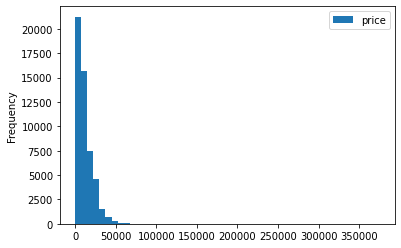

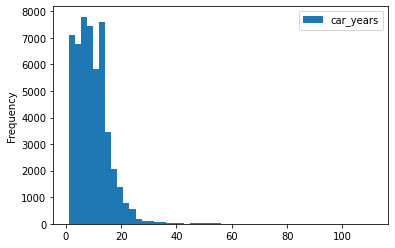

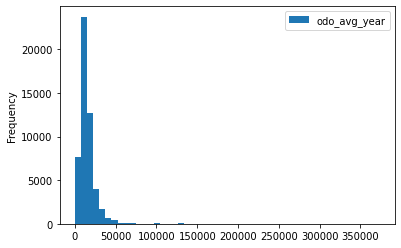

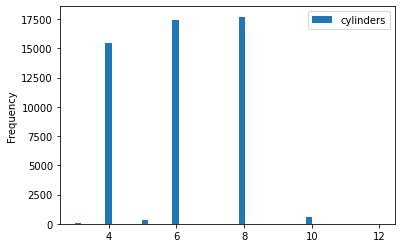

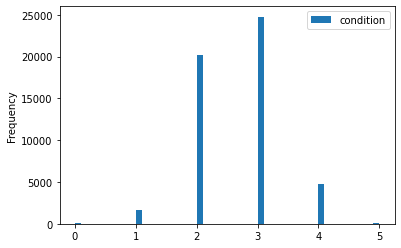

In [82]:
for column in ['price', 'car_years', 'odo_avg_year', 'cylinders', 'condition']:
    data_vehicles.plot(y=column, kind='hist', bins=50)
    plt.show()

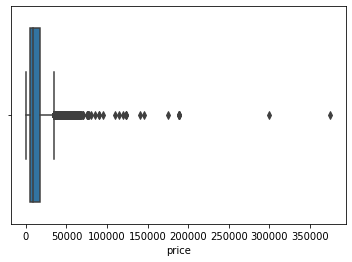

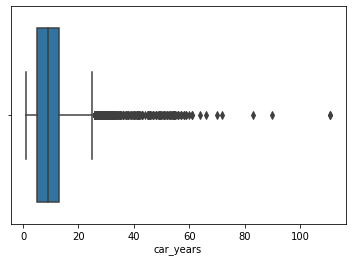

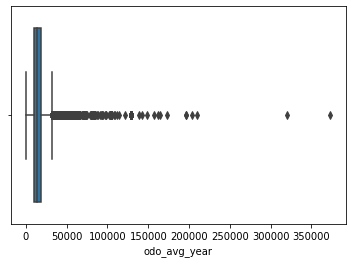

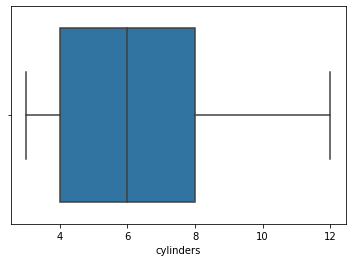

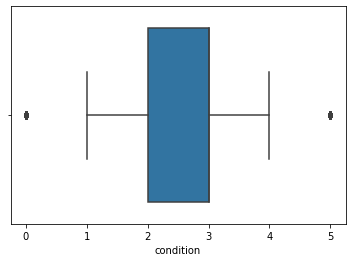

In [83]:
for column in ['price', 'car_years', 'odo_avg_year', 'cylinders', 'condition']:
    sns.boxplot(data=data_vehicles, x=column)
    plt.show()

Pada grafik data price, dan odo_avg_year terlihat memiliki nilai pada sumbu x sangat terpaut jauh dengan kumpulan data, ini mengindikasikan adanya nilai outlier terbukti pada grafik boxplot dimana banyaknya nilai outlier di semua parameter kecuali cylinders.

## Mempelajari dan Menangani Outlier


Pada temuan data visual sebalumnya terdapat masalah di beberapa parameter, seperti pada kolom price yang memiliki nilai hingga 350000 lebih, serta pada kolom car_years juga memiliki nilai hingga lebih 100 tahun, dan yang terakhir pada kolom odo_avg_year yang memiliki nilai hingga 250000. Data temuan tersebut bisa kita indikasikan sebagai data outlier yang dimana data tersebut akan mempengaruhi data lainnya sehingga perlu adanya perbaikan. 

In [84]:
def upper_lower_whisker(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    whisker_upper = 1.5*IQR + Q3
    whisker_lower = Q1 - 1.5*IQR
    return whisker_upper, whisker_lower

def remove_outlier(dataframe, column):
    upper, lower = upper_lower_whisker(dataframe[column])
    print(f'whisker_lower values : {lower}')
    print(f'whisker_upper values : {upper}')
    
    plt.title('Before cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()
    
    dataframe = dataframe[(dataframe[column] < upper) & (dataframe[column] > lower)]
    
    upper_check, lower_check = upper_lower_whisker(dataframe[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')
    
        
    plt.title('After cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()
    
    if lower == lower_check or upper == upper_check:
        print(f'\n====== [FINISHED] outlier in [{column}] column has been clear! ====== \n')
        return dataframe
    else:
        print(f'\n------ [RE-START] cleaning outlier in [{column}] column ------ \n')
        dataframe = remove_outlier(dataframe=dataframe, column=column)
        return dataframe


====== [START] cleaning outlier in condition column ====== 

whisker_lower values : 0.5
whisker_upper values : 4.5


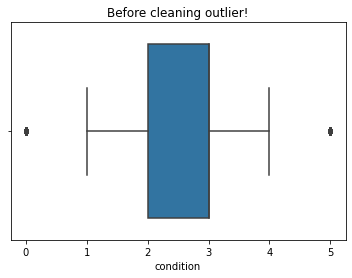

lower_check values : 0.5
upper_check values : 4.5


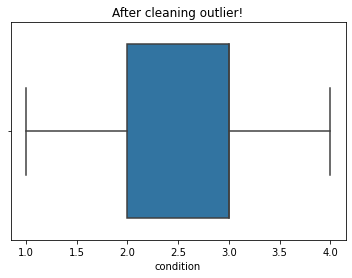


====== [FINISHED] outlier in [condition] column has been clear! ====== 


====== [START] cleaning outlier in days_listed column ====== 

whisker_lower values : -32.0
whisker_upper values : 104.0


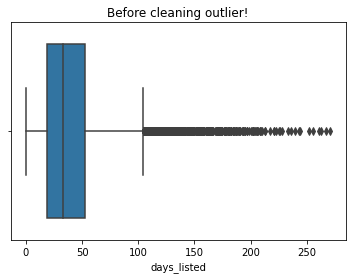

lower_check values : -31.5
upper_check values : 100.5


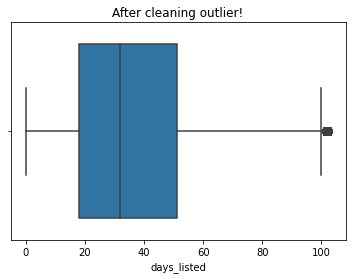


------ [RE-START] cleaning outlier in [days_listed] column ------ 

whisker_lower values : -31.5
whisker_upper values : 100.5


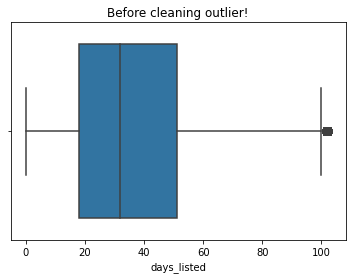

lower_check values : -30.0
upper_check values : 98.0


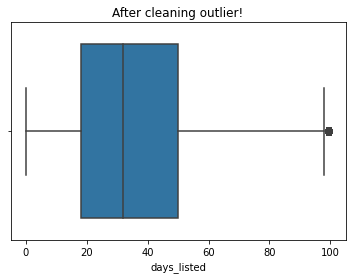


------ [RE-START] cleaning outlier in [days_listed] column ------ 

whisker_lower values : -30.0
whisker_upper values : 98.0


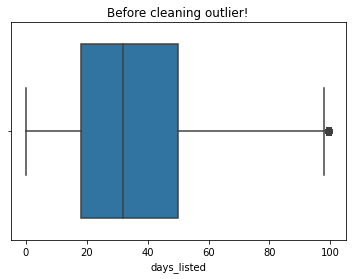

lower_check values : -30.0
upper_check values : 98.0


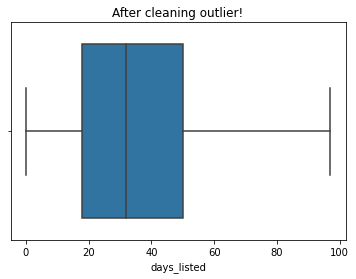


====== [FINISHED] outlier in [days_listed] column has been clear! ====== 


====== [START] cleaning outlier in car_years column ====== 

whisker_lower values : -7.0
whisker_upper values : 25.0


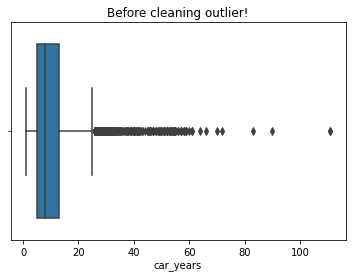

lower_check values : -5.5
upper_check values : 22.5


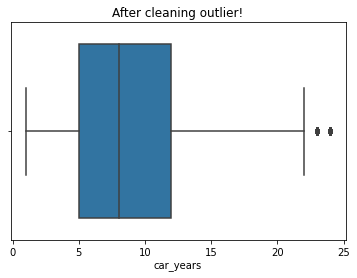


------ [RE-START] cleaning outlier in [car_years] column ------ 

whisker_lower values : -5.5
whisker_upper values : 22.5


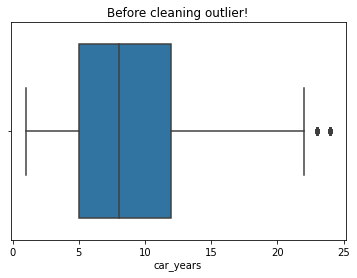

lower_check values : -5.5
upper_check values : 22.5


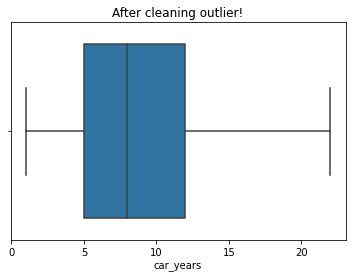


====== [FINISHED] outlier in [car_years] column has been clear! ====== 


====== [START] cleaning outlier in odo_avg_year column ====== 

whisker_lower values : -3524.0
whisker_upper values : 31540.0


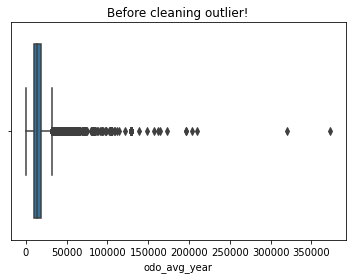

lower_check values : -2381.758333333333
upper_check values : 29116.708333333332


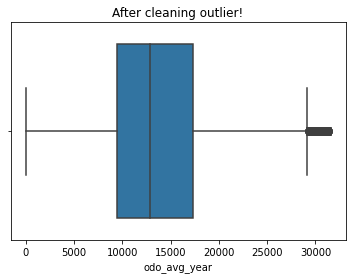


------ [RE-START] cleaning outlier in [odo_avg_year] column ------ 

whisker_lower values : -2381.758333333333
whisker_upper values : 29116.708333333332


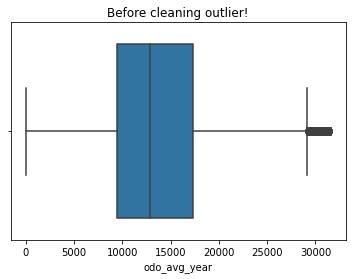

lower_check values : -2120.166666666668
upper_check values : 28533.611111111113


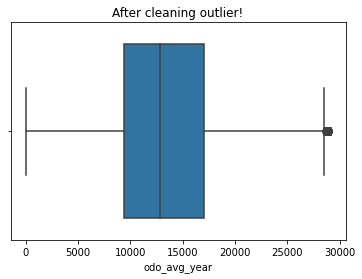


------ [RE-START] cleaning outlier in [odo_avg_year] column ------ 

whisker_lower values : -2120.166666666668
whisker_upper values : 28533.611111111113


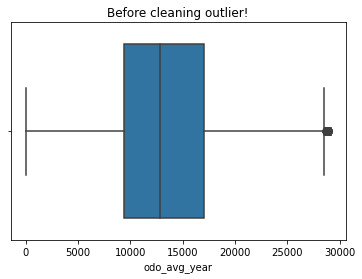

lower_check values : -2111.696428571431
upper_check values : 28467.01785714286


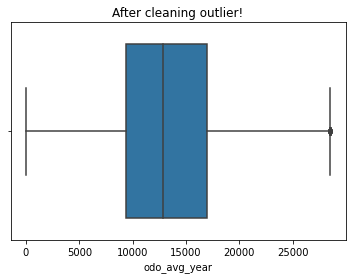


------ [RE-START] cleaning outlier in [odo_avg_year] column ------ 

whisker_lower values : -2111.696428571431
whisker_upper values : 28467.01785714286


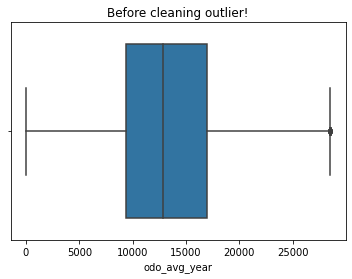

lower_check values : -2121.666666666666
upper_check values : 28473.0


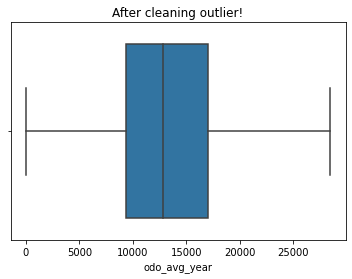


------ [RE-START] cleaning outlier in [odo_avg_year] column ------ 

whisker_lower values : -2121.666666666666
whisker_upper values : 28473.0


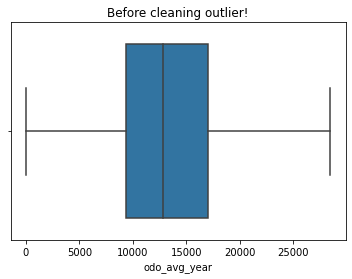

lower_check values : -2121.666666666666
upper_check values : 28473.0


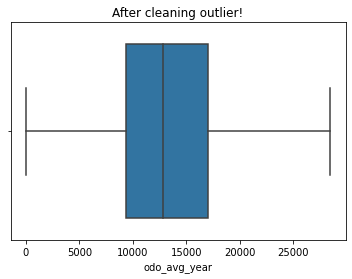


====== [FINISHED] outlier in [odo_avg_year] column has been clear! ====== 


====== [START] cleaning outlier in cylinders column ====== 

whisker_lower values : -2.0
whisker_upper values : 14.0


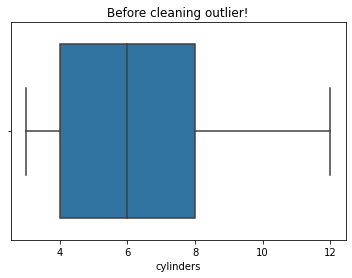

lower_check values : -2.0
upper_check values : 14.0


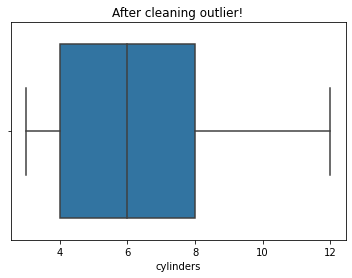


====== [FINISHED] outlier in [cylinders] column has been clear! ====== 


====== [START] cleaning outlier in price column ====== 

whisker_lower values : -11505.0
whisker_upper values : 32495.0


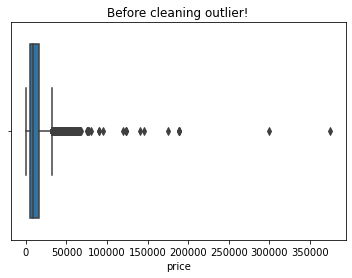

lower_check values : -10005.0
upper_check values : 29995.0


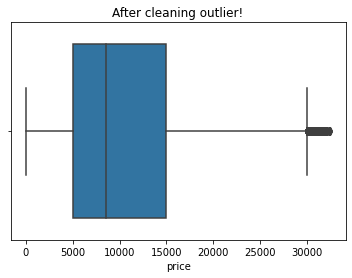


------ [RE-START] cleaning outlier in [price] column ------ 

whisker_lower values : -10005.0
whisker_upper values : 29995.0


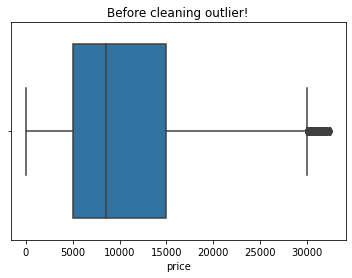

lower_check values : -9937.5
upper_check values : 29882.5


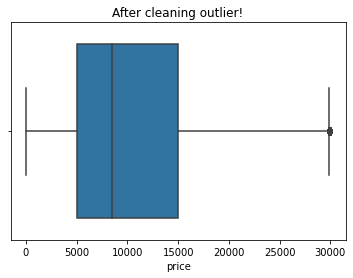


------ [RE-START] cleaning outlier in [price] column ------ 

whisker_lower values : -9937.5
whisker_upper values : 29882.5


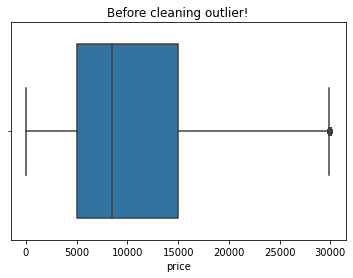

lower_check values : -9862.5
upper_check values : 29757.5


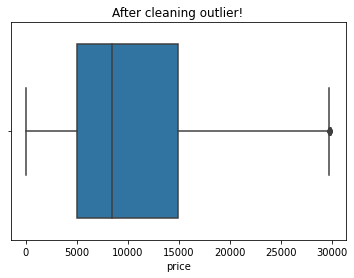


------ [RE-START] cleaning outlier in [price] column ------ 

whisker_lower values : -9862.5
whisker_upper values : 29757.5


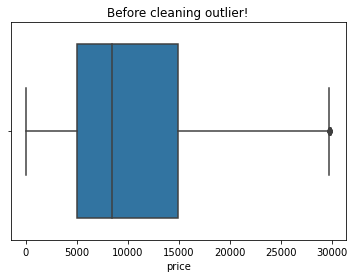

lower_check values : -9862.5
upper_check values : 29757.5


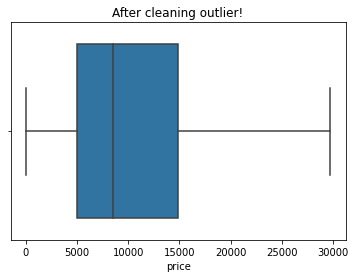


====== [FINISHED] outlier in [price] column has been clear! ====== 



In [85]:
df_final = data_vehicles.copy()
list_of_selected_column = ['condition', 'days_listed', 'car_years', 'odo_avg_year', 'cylinders', 'price']

for columns in list_of_selected_column:
    print(f'\n====== [START] cleaning outlier in {columns} column ====== \n')
    df_final = remove_outlier(dataframe=df_final, column=columns)

Disini kita menggunakan fungsi untuk mempermudah dalam perbaikan data outlier di beberapa parameter. Kolom 'price', 'condition', 'days_listed', 'car_years', 'odo_avg_year', 'cylinders' yang memiliki nilai outlier kita ubah nilai tersebut ke dalam nilai whisker atas maupun bawahnya masing-masing. Apabila nilai outlier sudah tidak muncul fungsi dari for loop pun juga akan memberikan hasil akhir.

## Mempelajari Parameter Inti Tanpa Outlier

Kita akan melihat apakah dataframe dengan nilai outlier maupun yang sudah tidak ada nilai outliernya akan mempengaruhi hasil visualisasi. Terlihat dataframe dengan nilai outlier pada grafik boxplot temuan nilai Q1, Q3 maupun nilai mediannya hampir tidak terlihat dan berkisar di titik yang sama pada semua kolom terkecuali parameter cylinders.

Sedangkan pada hasil perbaikan pada data tanpa outlier kita pun akhirnya bisa membaca data hanya dengan visualisasi datanya tanpa perlu membaca satu-satu nilainya per parameter.

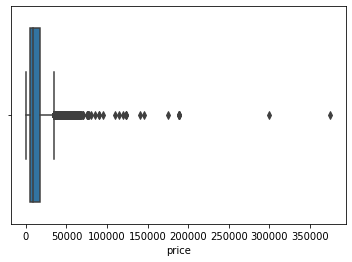

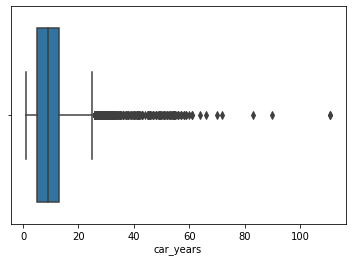

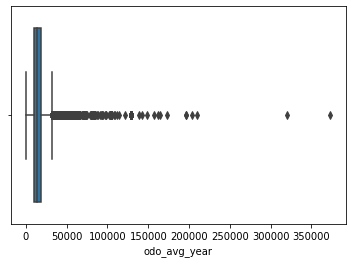

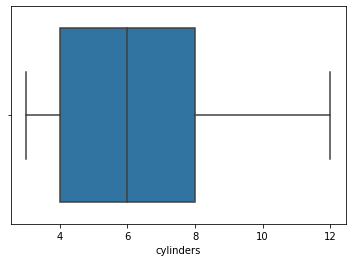

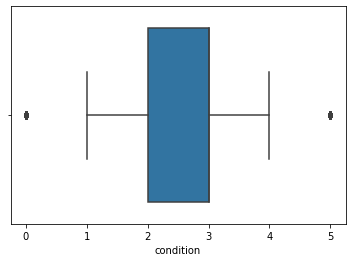

In [86]:
for column in ['price', 'car_years', 'odo_avg_year', 'cylinders', 'condition']:
    sns.boxplot(data=data_vehicles, x=column)
    plt.show()

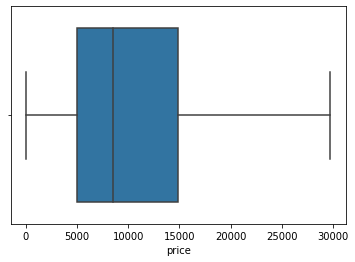

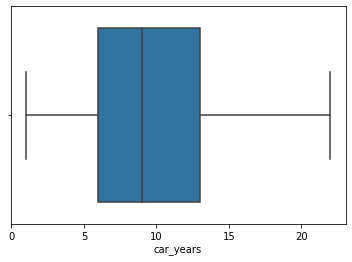

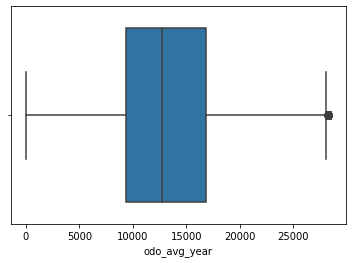

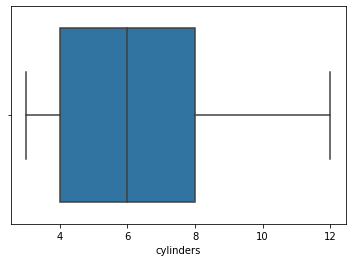

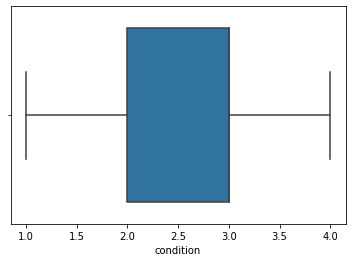

In [87]:
for column in ['price', 'car_years', 'odo_avg_year', 'cylinders', 'condition']:
    sns.boxplot(data=df_final, x=column)
    plt.show()

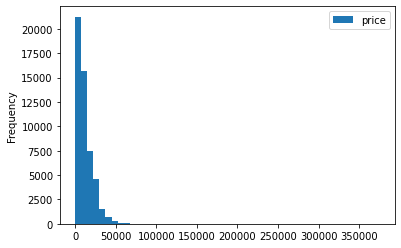

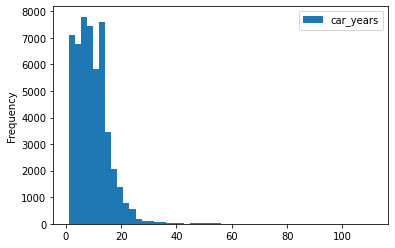

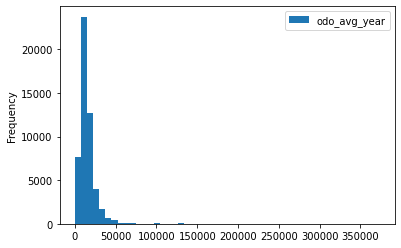

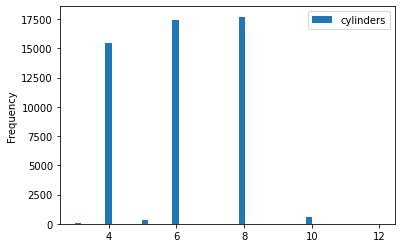

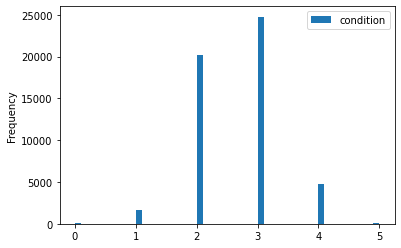

In [88]:
for column in ['price', 'car_years', 'odo_avg_year', 'cylinders', 'condition']:
    data_vehicles.plot(y=column, kind='hist', bins=50)
    plt.show()

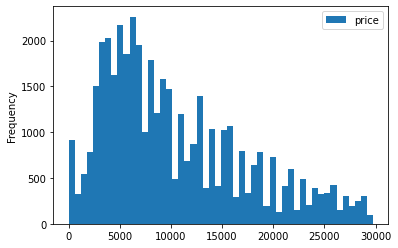

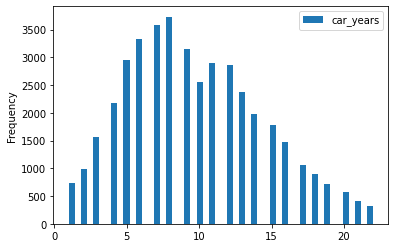

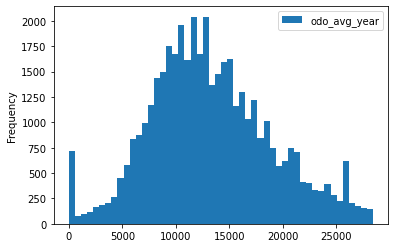

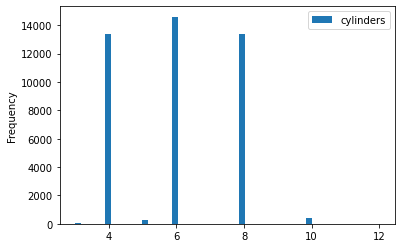

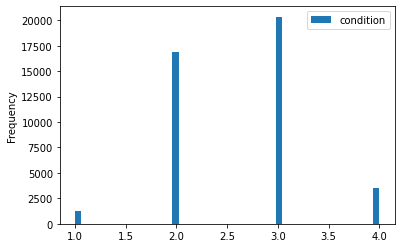

In [89]:
for column in ['price', 'car_years', 'odo_avg_year', 'cylinders', 'condition']:
    df_final.plot(y=column, kind='hist', bins=50)
    plt.show()

In [90]:
data_vehicles.describe()

,price,model_year,condition,cylinders,odometer,days_listed,odometer,year_posted,month_posted,day_posted,car_years,odo_avg_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,6.121067,115199.014508,39.55476,115199.014508,2018.307462,6.628491,15.449491,9.513906,15378.482765
std,10040.803015,6.099381,0.712447,1.657457,60484.863376,28.20427,60484.863376,0.461447,3.474134,8.736521,6.112976,11808.757090
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,75668.000000,2018.000000,3.000000,8.000000,5.000000,9363.636364
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,110908.000000,2018.000000,7.000000,15.000000,9.000000,13036.181818
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,147821.000000,2019.000000,10.000000,23.000000,13.000000,18222.222222
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,990000.000000,2019.000000,12.000000,31.000000,111.000000,373200.000000


In [91]:
df_final.describe()

,price,model_year,condition,cylinders,odometer,days_listed,odometer,year_posted,month_posted,day_posted,car_years,odo_avg_year
count,42102.00000,42102.000000,42102.000000,42102.000000,42102.000000,42102.000000,42102.000000,42102.000000,42102.000000,42102.000000,42102.000000,42102.000000
mean,10367.75975,2009.587336,2.621111,6.031685,117183.685419,35.921928,117183.685419,2018.314308,6.585317,15.444967,9.726973,13284.862694
std,7002.44334,4.717160,0.682344,1.647520,56739.834287,22.219918,56739.834287,0.464245,3.483906,8.727892,4.718831,5692.533836
min,1.00000,1997.000000,1.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000
25%,4995.00000,2006.000000,2.000000,4.000000,81000.000000,18.000000,81000.000000,2018.000000,3.000000,8.000000,6.000000,9399.447368
50%,8499.00000,2010.000000,3.000000,6.000000,114000.000000,32.000000,114000.000000,2018.000000,7.000000,15.000000,9.000000,12763.340909
75%,14900.00000,2013.000000,3.000000,8.000000,150000.000000,50.000000,150000.000000,2019.000000,10.000000,23.000000,13.000000,16857.142857
max,29750.00000,2019.000000,4.000000,12.000000,478000.000000,97.000000,478000.000000,2019.000000,12.000000,31.000000,22.000000,28458.000000


## Masa Berlaku Iklan 


days_listed pada visualisasi data merupakan data yang sudah bersih dari nilai outlier. Sekarang pada data statistiknya menunjukkan bahwa days_listed memiliki 44340 total nilai yang berarti juga total dari iklan yang di tayangkan. Dari sedemikian iklan dapat di tarik kesimpulan bahwa nilai minimum rata-rata iklan cepat tayang berkisar 18 hari yang didapat dari nilai Q2 (quantil bawah). Sedangkan pada nilai maximum rata-rata iklan lama tayang berkisar di angka 50 hari yang diperoleh dari nilai Q3 (quantil atas)

In [92]:
Q1 = df_final['days_listed'].quantile(0.25)
Q3 = df_final['days_listed'].quantile(0.75)
IQR = Q3 - Q1
whisker_upper = 1.5*IQR + Q3
whisker_lower = Q1 - 1.5*IQR

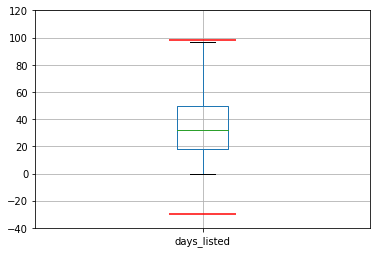

In [93]:
plt.ylim(-40, 120)
df_final.boxplot('days_listed')
plt.hlines(y=(whisker_upper, whisker_lower), xmin=0.9, xmax=1.1, color='red')

In [94]:
Q1

18.0

In [95]:
Q3

50.0

In [96]:
df_final['days_listed'].describe()

count    42102.000000
mean        35.921928
std         22.219918
min          0.000000
25%         18.000000
50%         32.000000
75%         50.000000
max         97.000000
Name: days_listed, dtype: float64

## Harga Rata-Rata Setiap Jenis Kendaraan

Berikut merupakan peringkat tipe kendaraan yang memiliki jumlah iklan terbanyak hingga yang paling sedikit, yaitu sedan paling banyak, lalu ada SUV, kemudian truck. Jumlah postingan paling sedikit ada di tipe kendaraan bus, offroad dan other.

Adanya kemungkinan seseorang memasarkan kendaraan dikarenakan alasan tertentu seperti milik pribadi seperti sedan dengan rata-rata harga hanya 6746 dolar, lalu SUV dengan harga 9897 dolar yang dimana memiliki nilai dengan jumlah iklan lebih dari 10000. Atau juga milik persero yang fokus pada kendaraan besar seperti bus, offroad, van dll. dengan kisaran hanya total 1-200 iklan.

,ads,mean_price
type,,
sedan,10668,6705.604049
SUV,10531,9786.810274
truck,9384,13806.002451
pickup,5296,13563.135008
coupe,1764,12995.888889
wagon,1379,8743.609862
mini-van,1011,7565.019782
hatchback,909,6614.702970
van,494,7633.844130


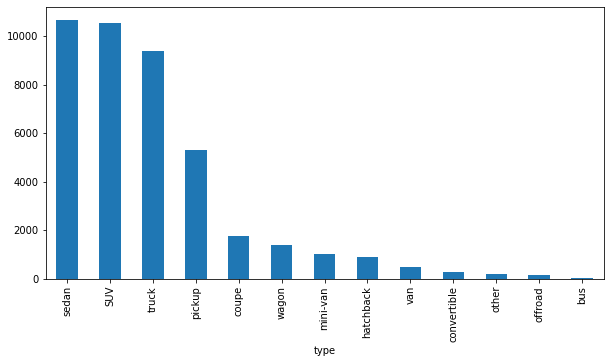

In [97]:
report_type = (df_final.groupby(['type']).agg({'model': 'count', 'price': 'mean'})
         .rename(columns = {'model': 'ads', 'price': 'mean_price'})
         .sort_values(by='ads', ascending=False))
report_type.head(25)['ads'].plot(kind='bar', figsize=(10,5))
report_type

## Faktor Harga

Setelah kita tahu harga rata-rata setiap jenis kendaraan dimana Sedan dan SUV yang memiliki tempat postingan terbanyak, kita akan gunakan itu sebagai acuan dan mencari faktor lain yang mempengaruhi harga. Berdasarkan perhitungan statistik korelasi dari data numerikal, yaitu car_years, condition, dan odo_avg_year yang memiliki faktor penting untuk mempengaruhi harga baik itu tinggi ataupun rendah. Sementara kita akan membuat dataframe dengan fokus tersebut.

In [98]:
df_sedan = df_final[df_final['type'] == 'sedan']
df_sedan = df_sedan[df_sedan['paint_color'].map(df_sedan['paint_color'].value_counts()) > 50]
df_sedan = df_sedan[df_sedan['transmission'].map(df_sedan['transmission'].value_counts()) > 50]

In [99]:
df_suv = df_final[df_final['type'] == 'SUV']
df_suv = df_suv[df_suv['paint_color'].map(df_suv['paint_color'].value_counts()) > 50]
df_suv = df_suv[df_suv['transmission'].map(df_suv['transmission'].value_counts()) > 50]

Cukup terlihat untuk korelasi dari harga dengan setiap tipe mobil yaitu sedan dan SUV tidaklah terpaut jauh untuk mendekati nilai 1/-1. Disini car_years lah yang memiliki nilai korelasi tertinggi dengan nilai -0.56 pada SUV dan -0.61 pada sedan. Di teruskan oleh parameter condition dengan 0.26 pada SUV, dan 0.30 pada sedan. Dan yang terakhir pada parameter odo_avg_year.

In [100]:
columns = ['odo_avg_year', 'car_years', 'condition', 'price']
display(df_sedan[columns].corr()[['price']].sort_values(by='price', ascending=False))
display(df_suv[columns].corr()[['price']].sort_values(by='price', ascending=False))

,price
price,1.000000
condition,0.301337
odo_avg_year,0.088122
car_years,-0.618348


,price
price,1.000000
condition,0.263945
odo_avg_year,0.157883
car_years,-0.563886


In [101]:
display(df_sedan.groupby('paint_color').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model': 'ads_sedan', 'price': 'median_price'}))
        .sort_values(by='median_price', ascending=False)
        .query('ads_sedan > 50'))

display(df_sedan.groupby('transmission').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model': 'ads_sedan', 'price': 'median_price'}))
        .sort_values(by='median_price', ascending=False)
        .query('ads_sedan > 50'))

,ads_sedan,median_price
paint_color,,
black,1539,6500.0
white,1302,6500.0
grey,1437,5995.0
red,839,5990.0
unknown,1924,5950.0
silver,1799,5800.0
blue,1100,5500.0
custom,256,5347.5
brown,235,4450.0


,ads_sedan,median_price
transmission,,
automatic,9985,5995.0
manual,523,4500.0
other,108,3995.0


Pada mobil sedan untuk kategori paint_color harga paling tinggi ada pada warna hitam dan putih dengan nilai median 6500 dolar, dan transmisi mobil sedan paling mahal pada transmisi automatic. Ini juga mengindikasikan peminat mobil sedan automatic dan warna hitam lah yang paling banyak di perjualbelikan dan memiliki nilai jual yang cukup tinggi.

In [102]:
display(df_suv.groupby('paint_color').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model': 'ads_suv', 'price': 'median_price'}))
        .sort_values(by='median_price', ascending=False)
        .query('ads_suv > 50'))

display(df_suv.groupby('transmission').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model': 'ads_suv', 'price': 'median_price'}))
        .sort_values(by='median_price', ascending=False)
        .query('ads_suv > 50'))

,ads_suv,median_price
paint_color,,
orange,71,16900.0
black,1833,9995.0
white,1610,8995.0
unknown,1878,7999.0
grey,1013,7995.0
silver,1373,7995.0
custom,270,7944.0
red,799,7500.0
brown,326,6999.5


,ads_suv,median_price
transmission,,
manual,409,10999.0
automatic,9905,7999.0
other,142,5997.5


Pada mobil SUV untuk kategori paint_color harga paling tinggi ada pada warna orange dengan harga 16900, lalu hitam 9995 dan putih dengan nilai median 8995 dolar, dan transmisi mobil SUV paling mahal pada transmisi manual dengan harga 10999. Melihat iklan mobil SUV warna orange hanya 71 iklan berbanding dengan warna hitam dan putih yang sampai 1833 pengiklan sepertinya untuk mobil SUV warna orange merupakan mobil yang cukup langka sehingga membuat harganya menjadi tinggi.

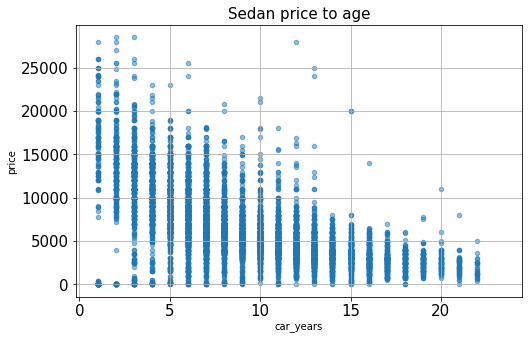

In [103]:
df_sedan.plot(x='car_years', y='price', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15, alpha=0.5)

plt.title('Sedan price to age', fontsize=15)
plt.xlim(-0.2, 24.5)
plt.show()

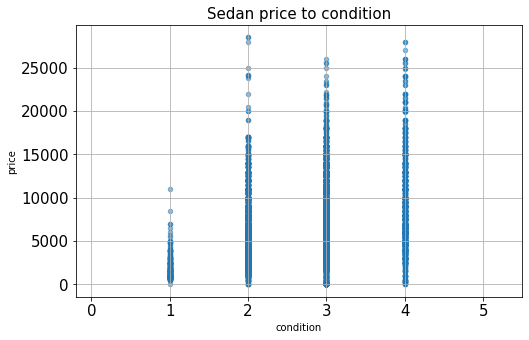

In [104]:
df_sedan.plot(x='condition', y='price', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15, alpha=0.5)

plt.title('Sedan price to condition', fontsize=15)
plt.xlim(-0.2, 5.5)
plt.show()

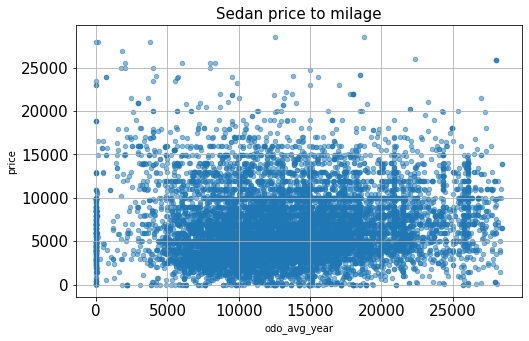

In [105]:
df_sedan.plot(x='odo_avg_year', y='price', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15, alpha=0.5)

plt.title('Sedan price to milage', fontsize=15)
plt.show()

Sedan, car_years:
   - Korelasi antara umur kendaraan dengan harga yaitu korelasi negatif, dimana makin besar umur kendaraan maka makin murah harga yang di tawarkan
   - Data tersebar merata dari x=0-15, y=5k-10k
   
Sedan, condition:
   - Harga mobil paling mahal adalah ketika seperti baru(like new)
   - Harga mobil paling murah adalah ketika menjadi rongsokan (salvage)
   - Korelasi antara kondisi kendaraan dengan harga yaitu korelasi positif, dimana makin tinggi peringkat kondisi suatu kendaraan maka makin tinggi juga harga yang di tawarkan

Sedan, odo_avg_year:
   - Korelasi harga dengan jarak tempuh sepertinya tidak terlalu terikat dimana jarak tempuh rendah maupun tinggi tidak terlalu merubah harga itu sendiri 
   - Data berpusat pada satu titik dimana x=10k-15k, dan y=5k

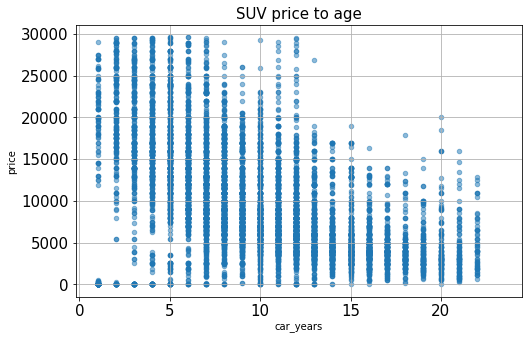

In [106]:
df_suv.plot(x='car_years', y='price', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15, alpha=0.5)

plt.title('SUV price to age', fontsize=15)
plt.xlim(-0.2, 24.5)
plt.show()

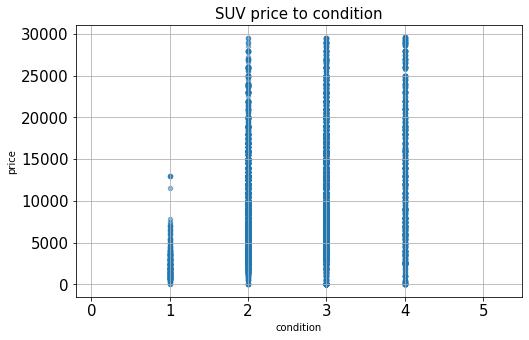

In [107]:
df_suv.plot(x='condition', y='price', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15, alpha=0.5)

plt.title('SUV price to condition', fontsize=15)
plt.xlim(-0.2, 5.5)
plt.show()

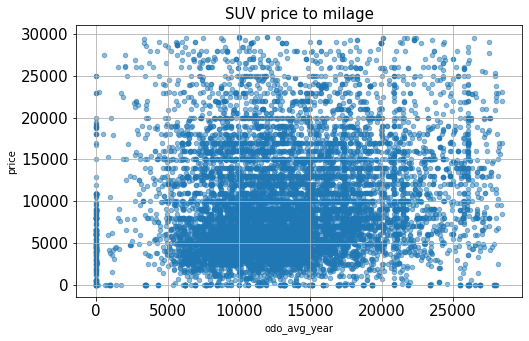

In [108]:
df_suv.plot(x='odo_avg_year', y='price', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15, alpha=0.5)

plt.title('SUV price to milage', fontsize=15)
plt.show()

SUV, car_years:
   - Korelasi antara umur kendaraan dengan harga yaitu korelasi negatif, dimana makin besar umur kendaraan maka makin murah harga yang di tawarkan
   - Data tersebar merata dari x=5-15, y=5k-15k
   
SUV, condition:
   - Penjualan mobil SUV terlihat memiliki kondisi yang baik dengan peringkat 2, 3, dan 4 lah yang paling banyak data tersebar
   - harga mobil paling murah adalah peringkat 1
   - Korelasi antara kondisi kendaraan dengan harga yaitu korelasi positif, dimana makin tinggi peringkat kondisi suatu kendaraan maka makin tinggi juga harga yang di tawarkan

SUV, odo_avg_year:
   - Korelasi harga dengan jarak tempuh sepertinya tidak terlalu terikat dimana jarak tempuh rendah maupun tinggi tidak terlalu merubah harga itu sendiri 
   - Data berpusat pada satu titik dimana x=8k-13k, dan y=5k-10k

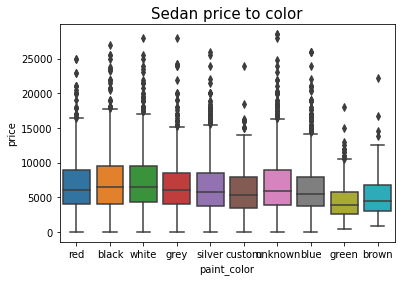

In [109]:
sns.boxplot(data=df_sedan, x='paint_color', y='price')
plt.title('Sedan price to color', fontsize=15)
plt.show()

Sedan, paint_color:
  - Terlihat grafik boxplot pada semua warna cukup proporsional
  - Nilai median di semua parameter tidak berbeda jauh, pada warna green sajalah median cenderung mengarah ke bawah atau ke arah Q1 karna memiliki harga yang paling rendah
  - Masih banyak sekali data outlier untuk setiap warnanya

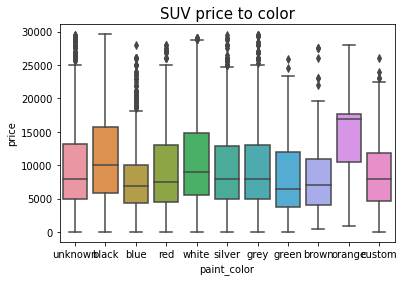

In [110]:
sns.boxplot(data=df_suv, x='paint_color', y='price')
plt.title('SUV price to color', fontsize=15)
plt.show()

SUV, paint_color:
   - Terlihat grafik boxplot pada semua warna cukup proporsional, yang menunjukkan nilai harganya tidak terpaut jauh
   - Nilai median di semua parameter cukup acak, hanya pada warna orange saja cenderung mengarah ke atas(mendekati Q3) mengingat harga SUV warna orange lah yang paling mahal
   - Masih banyak sekali data outlier untuk setiap warnanya

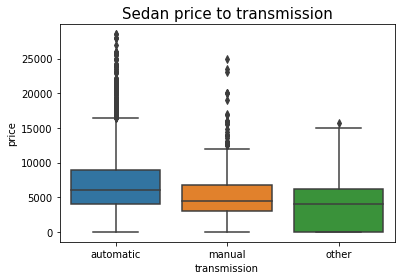

In [111]:
sns.boxplot(data=df_sedan, x='transmission', y='price')
plt.title('Sedan price to transmission', fontsize=15)
plt.show()

Sedan, transmission:
   - Terlihat grafik boxplot pada automatic dan manual cukup proporsional, akan tetapi pada other cenderung ke arah bawah
   - Nilai median di ketiga grafik berbeda-beda, pada other median cenderung mengarah ke bawah atau ke arah Q1
   - Masih banyak sekali data outlier untuk setiap transmisinya

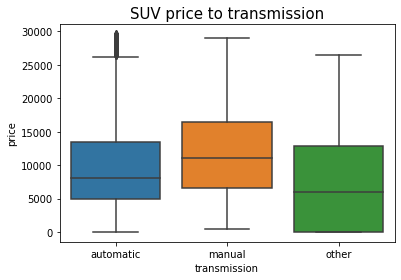

In [112]:
sns.boxplot(data=df_suv, x='transmission', y='price')
plt.title('SUV price to transmission', fontsize=15)
plt.show()

SUV, transmission:
   - Terlihat grafik boxplot pada automatic dan manual memiliki nilai yang berbeda, pada other cenderung ke arah bawah seperti pada grafik mobil sedan
   - Nilai median pada manual cenderung tinggi, sedangkan pada automatic cenderung kearah Q1-nya
   - Pada transmisi other memiliki nilai Q1 sama dengan batas bawah
   - Masih banyak sekali data outlier untuk transmisi automatic

## Kesimpulan Umum


Berlandaskan dari data kotor yang berjumlahkan 51525 data pada dataframe data_vehicles mulai dari pemrosesan hingga menganalisis data sampai data final yang berjumlahkan 42102 total data pada dataframe df_final, banyak nilai yang perlu diperbaiki mulai dari nilai-nilai yang hilang di beberapa kolom seperti model_year(3619), odometer(7892), cylinders(5260), paint_color(9267), dan is_4wd(25953). Dengan bantuan pandas kita bisa mencari dan memperbaiki nilai yang hilang tersebut .isnull() dan .fillna(). Dikarenakan nilai yang hilang cukup banyak oleh karna itu kita ubah nilai yang hilang pada odometer, cylinders dan model years ke dalam beberapa kondisi, dimana kita akan menyesuaikan dengan parameter yang lain.

Pada nilai yang memiliki tipe data yang kurang sesuai kita ubah juga menjadi yang lebih baik. Seperti pada kolom date_posted yang kita ubah tipenya yang bermula obyek menjadi datetime64. Dan pada kolom yang sekiranya mengandung nilai pembulatan seperti cylinders, is_4wd, dan model_year.

Selanjutnya agar mempermudah pengerjaan kita perlu membuat kolom baru yang berisi pengelompokan, disini kita membuat year_posted, month_posted dan day_posted dimana kita bisa langsung tahu waktu dalam tahun, bulan atau hari yang kita butuhkan di setiap iklan yang ditayangkan berdasarkan kolom date_posted. Yang kedua kita buat kolom car_years guna mengetahui umur kendaraan secara umum berdasarkan kolom date_posted yang dikurangi oleh model_year. Yang ketiga kita buat kolom odo_avg_year yang berguna untuk mengetahui nilai jarak tempuh sebuah kendaraan dalam tahun berdasarkan odometer yang dibagi dengan car_years.

Terdapat beberapa parameter spekulatif yang menjadi acuan awal untuk melihat apakah nilai di parameter tersebut terdapat outlier atau tidak. Disini kita gunakan pada parameter 'price', 'condition', 'odo_avg_year', 'car_years', dan 'cylinders'. Berdasarkan hasil temuan secara visual data ternyata banyak sekali nilai outlier di beberapa kolom, salah satunya pada kolom price dengan nilai hingga 350000 lebih, serta pada kolom car_years juga memiliki nilai hingga lebih 100 tahun, dan yang terakhir pada kolom odo_avg_year yang memiliki nilai hingga 250000.

Setelah tau outliernya dimana saja, sekarang kita memperbaiki nilai tersebut dengan menggunakan fungsi untuk membuat rangkaian dalam mencari nilai Q1, Q3 dan mediannya. Adapun whisker atas atau bawah untuk mengetahui batas nilai berlebih maupun yang kurang. Hasil yang diperoleh dalam kolom price nilai max-nya sekarang menjadi 29757, yang dimana sebelumnya hingga 370000. Metode ini dilakukan dengan cara di masukan kedalam fungsi awal hingga mencapai nilai whisker batas atas maupun bawah setiap parameter.

Perbandingan data outlier dengan data non-outlier sekarang sudah terlihat lebih jelas dan tidak adanya nilai outlier pada kolom price. Hasil perbaikan pada data tanpa outlier kita pun akhirnya bisa membaca data hanya dengan visualisasi datanya tanpa perlu membaca satu-satu nilainya per parameter seperti pada dataframe dengan banyak nilai outlier.

Selanjutnya kita juga akan lebih spesifik dalam mempersiapkan data dengan menentukan nilai suatu kendaraan berdasarkan days_listed untuk mengetahui seberapa lama dan cepat iklan suatu kendaraan bisa dikatakan tidak terlalu cepat maupun lama. days_listed yang memiliki tipe data numerikal sehingga kita cukup menghitung Q1 sebagai nilai bawah nya yaitu 18 hari dan Q3 sebagai nilai atasnya dalam 50 hari. 

Kemudian pada kolom type kita spesifik mencari kendaraan yang paling banyak di iklankan. Disini kita mendapati hasil bahwa kendaraan sedan dan SUV lah yang paling populer dengan jumlah iklan lebih dari 10000. Kita akan gunakan ini sebagai acuan dan mencari faktor lain yang mempengaruhi harga. Berdasarkan perhitungan statistik korelasi dari data numerikal, yaitu car_years, condition, dan odo_avg_year yang juga perhitungan secara kategorial berdasarkan parameter paint_color dan transmision.


Setelah mempersiapkan data, kita masuk ke tahap analisis hasil secara visual:


paintcolor dan transmission, 
Sedan: 
   - Pada mobil sedan untuk kategori paint_color harga paling tinggi ada pada warna hitam dan putih dengan nilai median 6500 dolar, dan transmisi mobil sedan paling mahal pada transmisi automatic. Ini juga mengindikasikan peminat mobil sedan automatic dan warna hitam lah yang paling banyak di perjualbelikan dan memiliki nilai jual yang cukup tinggi.

paintcolor dan transmission,
SUV: 
   - Pada mobil SUV untuk kategori paint_color harga paling tinggi ada pada warna orange dengan harga 16900, lalu hitam 9995 dan putih dengan nilai median 8995 dolar, dan transmisi mobil SUV paling mahal pada transmisi manual dengan harga 10999. Melihat iklan mobil SUV warna orange hanya 71 iklan berbanding dengan warna hitam dan putih yang sampai 1833 pengiklan sepertinya untuk mobil SUV warna orange merupakan mobil yang cukup langka sehingga membuat harganya menjadi tinggi.


condition,
Sedan:
   - Berdasarkan hasil visual korelasi antara kondisi kendaraan dengan harga yaitu korelasi positif, dimana makin tinggi peringkat kondisi suatu kendaraan maka makin tinggi juga harga yang di tawarkan
   - Kondisi mobil sedan yang dijual dalam kondisi baik dengan paling banyak dijual pada peringkat 2, 3 dan 4

condition,
SUV:
   - Korelasi antara kondisi kendaraan dengan harga yaitu korelasi positif, dimana makin tinggi peringkat kondisi suatu kendaraan maka makin tinggi juga harga yang di tawarkan
   - Kondisi mobil SUV yang dijual dalam kondisi baik dengan paling banyak dijual pada peringkat 2, 3 dan 4 namun mengingat harga mobil tipe ini cukup tinggi daripada sedan
   

car_years,
Sedan:
   - Korelasi antara umur kendaraan dengan harga yaitu korelasi negatif, dimana makin besar umur kendaraan maka makin murah harga yang di tawarkan

car_years,
SUV:
   - Korelasi antara umur kendaraan dengan harga yaitu korelasi negatif, dimana makin besar umur kendaraan maka makin murah harga yang di tawarkan
   - Sama halnya dengan mobil sedan, faktor lain mungkin karna kendaraan tua perawatannya harus lebih ekstra dan pembelian untuk onderdil nya pun harus di perhatikan.
   

odo_avg_year,
Sedan:
   - Korelasi harga dengan jarak tempuh sepertinya tidak terlalu terikat dimana jarak tempuh rendah maupun tinggi tidak terlalu merubah harga itu sendiri

odo_avg_year,
SUV:
   - Korelasi harga dengan jarak tempuh sepertinya tidak terlalu terikat dimana jarak tempuh rendah maupun tinggi tidak terlalu merubah harga itu sendiri
   - Odometer yang menunjukkan angka tinggi biasanya lebih murah dikarenakan kendaraan tersebut telah digunakan cukup lama meskipun umur belum tua, akan tetapi penggunaan yang sering tersebut juga mencerminkan kesehatan kendaraan itu sendiri.
   

Secara umum apabila kita ambil data finalnya, kita akan mendapatkan faktor paling relevan dengan harga(price) yaitu pertama car_years, kedua condition, dan ketiga odo_avg_year berdasarkan korelasinya. Pada paint_color dan transmission di kedua tipe mobil baik sedan maupun SUV kurang lebih datanya cukup proporsional, lebih kepada preferensi customer masing-masing. Akan tetapi mengingat data awal banyak sekali data yang hilang sebelum di analisis, besar kemungkinan hasil daripada temuan dan kesimpulan ini juga akan berbeda apabila kita tidak memiliki nilai yang hilang.